In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import pandas
import sklearn
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold, cross_val_score, train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.learning_curve import learning_curve

/usr/lib/python3/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/lib/python3/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/usr/lib/python3/dist-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
data_dir = './data/'
train_df = pd.read_csv(data_dir + 'train.csv')
descriptions = train_df.groupby('label').describe()
descriptions.to_csv(data_dir + 'descriptions.csv')
descriptions.head()

Unnamed: 0                                                              \
           count          mean          std   min      25%      50%      75%   
label                                                                          
0        10461.0  12393.232961  7175.574798  10.0  6167.00  12405.0  18632.0   
1         3579.0  12591.977647  7154.479452   1.0  6471.00  12665.0  18778.5   
2         4874.0  12381.087197  7191.670984   3.0  6195.25  12263.5  18579.5   
3         5926.0  12393.294465  7155.495973   0.0  6138.75  12439.5  18486.5   

                  bcced             ...   salutations          urls  \
           max    count      mean   ...           75%  max    count   
label                               ...                               
0      24839.0  10461.0  0.000765   ...           1.0  1.0  10461.0   
1      24837.0   3579.0  0.000000   ...           1.0  1.0   3579.0   
2      24838.0   4874.0  0.004514   ...           1.0  1.0   4874.0   
3      24834.0   5926.0  0.000169   ...           1.0  1.0   5926.0   

                                                             
            mean        std  min   25%   50%    75%     max  
label                                                        
0      27.043495  35.397882  0.0   7.0  19.0   33.0   617.0  
1      79.918692  58.417474  0.0  33.0  71.0  108.0   386.0  
2       7.417932  80.817351  0.0   0.0   2.0    8.0  5532.0  
3      63.188660  53.081205  0.0  22.0  48.0   95.0   332.0  

[4 rows x 72 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33fe3a4f60>,
      dtype=object)

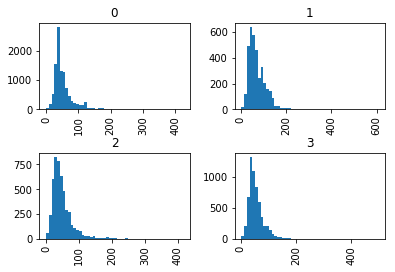

In [207]:
train_df.hist(column='chars_in_subject', by='label', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e814b30b8>,
      dtype=object)

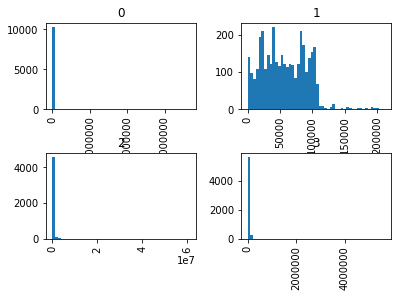

In [10]:
train_df.hist(column='chars_in_body', by='label', bins=50)

In [4]:
train_df['designation'] = train_df['designation'].apply(lambda x: 100 if type(x) is not int else x)
#train_df.plot.pie(y='designation', by='label', bins=50, subplots=True)
train_df['org'] = train_df['org'].apply(lambda x: 'porn' if type(x) is str and 'porn' in x  else x)
train_df['org'] = train_df['org'].apply(lambda x: 'centralesupelec' if type(x) is str and ('geeps' in x or 'supelec' in x or 'student-cs' in x) else x)
train_df['org'] = train_df['org'].apply(lambda x: 'academia' if type(x) is str and ('usief' in x or 'acm' in x or 'iiitd' in x or 'inria' in x or 'researchgatemail' in x or 'researchgate' in x or 'academia' in x or 'ieee' in x or 'slack' in x or 'springboard' in x) else x)
train_df['org'] = train_df['org'].apply(lambda x: 'social_media' if type(x) is str and ('flickr'in x or 'social' in x or 'facebook' in x or 'twitter' in x or 'quora' in x or 'youtube' in x or 'pinterest' in x or 'medium' in x) else x)
train_df['org'] = train_df['org'].apply(lambda x: 'online_courses' if type(x) is str and ('nptel' in x or 'udemy' in x or 'mit'in x or 'classroom' in x or 'piazza' in x or 'duolingo' in x or 'learning' in x or 'edx' in x or 'coursera' in x or 'khanacademy' in x or 'usebackpack' in x)else x )
train_df['org'] = train_df['org'].apply(lambda x: 'google' if type(x) is str and ('google' in x )else x )

train_df['org'] = train_df['org'].apply(lambda x: 'coding' if type(x) is str and ('mapbox' in x or 'api' in x or 'php' in x or 'tech' in x or 'udacity' in x or 'evernote' in x or 'data' in x or 'stack' in x or 'sharelatex' in x or 'aws' in x or 'codalab' in x or 'trello' in x or 'overleaf' in x  or 'stackexchange' in x or 'hacker' in x or 'code' in x or 'kaggle' in x or 'github' in x or 'nvidia' in x or 'repository' in x ) else x)
train_df['org'] = train_df['org'].apply(lambda x: 'online_shopping' if type(x) is str and ('ebay' in x or 'amazon' in x) else x)
train_df['org'] = train_df['org'].apply(lambda x: 'work_media_offer' if type(x) is str and ('cocubes' in x or 'monsterindia' in x or 'job' in x or 'linkedin' in x or 'glassdoor' in x or 'hire' in x or 'career' in x) else x)
train_df['org'] = train_df['org'].apply(lambda x: 'email' if type(x) is str and ('mail' in x ) else x)
train_df['org'] = train_df['org'].apply(lambda x: 'travel' if type(x) is str and ('atlassian' in x or 'airfrance' in x or 'airindia' in x or 'airserbia' in x or 'thomascook' in x or 'easyjet' in x or 'ryanair' in x or 'uber' in x) else x)
train_df['org'] = train_df['org'].apply(lambda x: 'entertainment' if type(x) is str and ('audio' in x or 'audible' in x or 'video' in x or 'imdb' in x or 'cinema' in x or 'entertainment' in x or 'spotify' in x or 'music' in x or 'movies' in x) else x)
train_df['org'] = train_df['org'].apply(lambda x: 'offers_newsletters' if type(x) is str and ('indiatimes' in x or 'news' in x or 'coupon' in x or 'letter' in x or 'offer' in x)else x)
train_df['org'] = train_df['org'].apply(lambda x: 'softwares' if type(x) is str and ('app' in x or 'dropbox' in x or 'airtable' in x or 'splitwise' in x)else x)
train_df['org'] = train_df['org'].apply(lambda x: 'bank' if type(x) is str and ('kotak' in x or 'hsbc' in x or 'paytm' in x)else x)
train_df['org'] = train_df['org'].apply(lambda x: 'food' if type(x) is str and ('bigbasket' in x or 'food' in x )else x)
train_df['org'] = train_df['org'].apply(lambda x: 'other' if type(x) is str and (x not in ['food', 'bank', 'softwares', 'offers_newsletters', 'entertainment', 'travel', 'porn', 'centralesupelec', 'academia', 'social_media', 'online_courses', 'google', 'coding', 'online_shopping',  'work_media_offer', 'email'] )else x )


In [8]:
df_results = pd.DataFrame(train_df['org'].value_counts(), columns=['org'])
df_results.index.names = ['ID']
df_results.to_csv(data_dir + 'categories.csv')

res = train_df[train_df['label'] == 2]['org'].value_counts()
res

academia           4338
centralesupelec     235
coding              158
email                27
other                13
google                7
online_courses        6
Name: org, dtype: int64

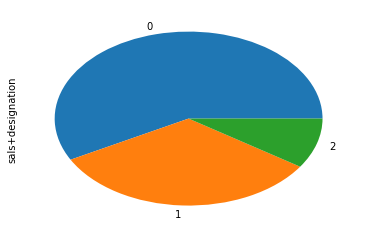

In [13]:
train_df['sals+designation'] = train_df['salutations'] +  train_df['designation']

res = train_df[train_df['label'] == 1]['sals+designation'].value_counts()
res.plot.pie()

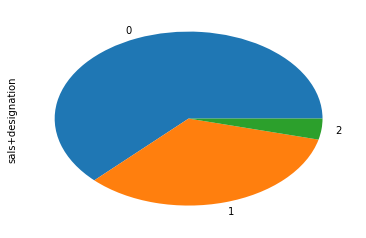

In [14]:
res = train_df[train_df['label'] == 0]['sals+designation'].value_counts()
res.plot.pie()

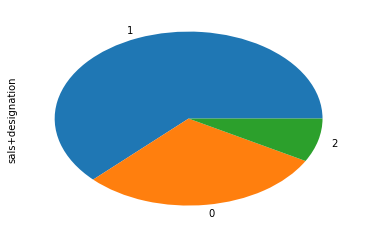

In [15]:
res = train_df[train_df['label'] == 2]['sals+designation'].value_counts()
res.plot.pie()

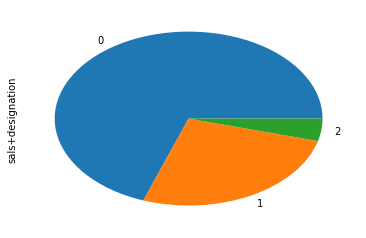

In [16]:
res = train_df[train_df['label'] == 3]['sals+designation'].value_counts()
res.plot.pie()

In [47]:
train_df['sals+designation'] = train_df['salutations'] + train_df['designation'] 